<a href="https://colab.research.google.com/github/Moi1oM/To_learn_AI/blob/master/Chp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target)=\
  keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


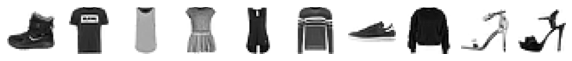

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [2]:
import matplotlib.pyplot as plt
fig, axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

print([train_target[i] for i in range(10)])

import numpy as np
print(np.unique(train_target,return_counts=True))

In [3]:
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)
print(train_scaled.shape)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',max_iter=5,random_state=42)
scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

(60000, 784)
0.8195666666666668


In [4]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)
print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [5]:
dense=keras.layers.Dense(10,activation='softmax',input_shape=(784,))
model=keras.Sequential(dense)

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6096 - accuracy: 0.7938
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4807 - accuracy: 0.8390
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4568 - accuracy: 0.8467
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4456 - accuracy: 0.8521
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4374 - accuracy: 0.8554


In [6]:
dense1=keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2=keras.layers.Dense(10,activation='softmax')

model=keras.Sequential([dense1,dense2])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
model=keras.Sequential([keras.layers.Dense(100,activation='sigmoid', input_shape=(784,),name='hidden'),keras.layers.Dense(10,activation='softmax',name='output')],name='패션 MNIST 모델')
model.summary()


Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

# model = keras.Sequential()
# model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
# model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5644 - accuracy: 0.8082
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4071 - accuracy: 0.8531
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3723 - accuracy: 0.8653
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3499 - accuracy: 0.8729
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3327 - accuracy: 0.8795


In [16]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

(train_input, train_target),(test_input, test_target)=\
  keras.datasets.fashion_mnist.load_data()
train_scaled=train_input /255.0
train_scaled, val_scaled, train_target, val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5280 - accuracy: 0.8143
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3936 - accuracy: 0.8584
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3564 - accuracy: 0.8722
Epoch 4/5
1

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3047 - accuracy: 0.8906
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2871 - accuracy: 0.8946
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.8991
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2624 - accuracy: 0.9035
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2505 - accuracy: 0.9066


In [18]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3542 - accuracy: 0.8777


[0.3542459309101105, 0.8777499794960022]

In [19]:
#4-3
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model
model=model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=5,verbose=0)
print(history.history.keys())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


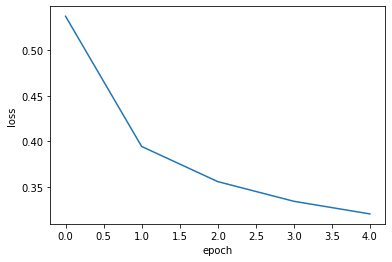

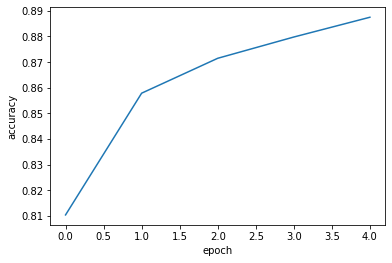

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

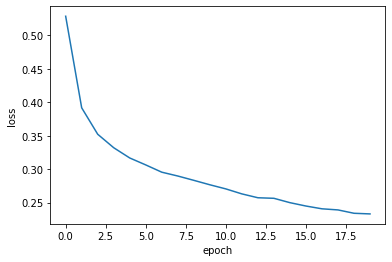

In [22]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


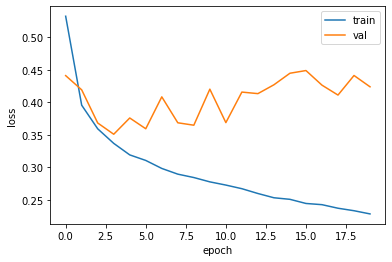

In [26]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

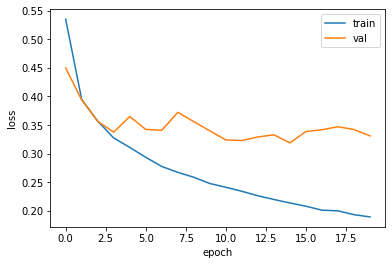

In [28]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [29]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


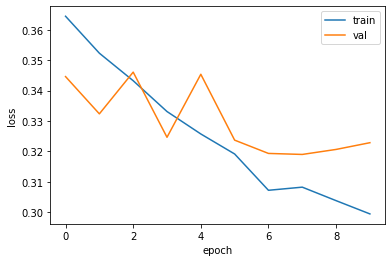

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [34]:
model.save_weights('model-weights.h5')
model.save('model=whole.h5')
!ls -al *.h5

model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

import numpy as np
val_labels=np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

-rw-r--r-- 1 root root 333448 Jun 24 16:06  model-weights.h5
-rw-r--r-- 1 root root 334816 Jun 24 16:06 'model=whole.h5'
0.8858333333333334


In [36]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3199 - accuracy: 0.8860


[0.31989890336990356, 0.8859999775886536]

In [38]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
ealry_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,ealry_stopping_cb])